## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. For classification, it is discrete and normally categorical, while regressions are continuous and normally numerical values 
2. A confusion matrix is used to visualize and evaluate how a classification algorithm is doing as well as compares acetual and predicted labels. It displays information such as which classes are predicted correctly, confused, and the weaknesses are.
3. Accuracy is the number of correct predictions over the total number of predictions. And when classes are imbalanced, it can be misleading.
4. RMSE is used to measure the prediction error size for regression models and lower RMSE means predictions are, on average, closer to the true values.
5. Overfitting is when the model is too complex, learning nose and specific details in training data which leads to low training error but high validation error. Underfitting occurs when a model is too simple, failing to capture underlying patterns which leads to high error on both training and validation sets. 
6. Since k-NN depends on k, you can choose the best k taht best generalizes rather than the one that merely fits training noise by evaluating potential k values on held-out test/validation data. It can reduce overfitting on any new data. 
7. Class label is simple and easy to act on, works well when decisions are straight forward however it doesn't see uncertainty very well. As for probability distrbution, it is quite good at showing uncertainty, able to set decision thresholds, but can be difficult to interpret when when it comes to single labels and probabilities are not always 'true' probabilities.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Dimensions: (2499, 3)
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
Missing values:
 price      0
year       0
mileage    0
dtype: int64
k = 3
MSE: 147993702.1862222
RMSE: 12165.266219290977



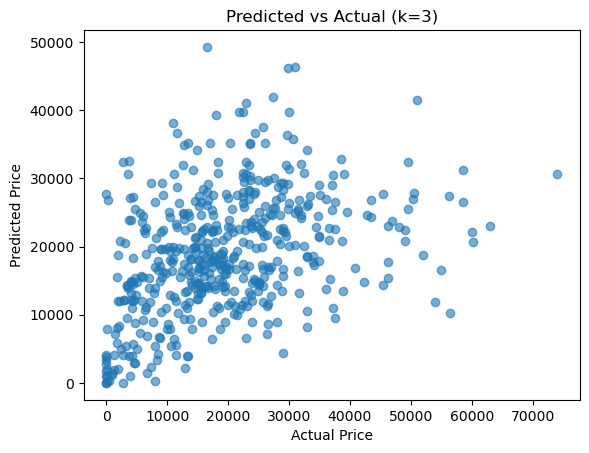

k = 10
MSE: 117399126.10604002
RMSE: 10835.087729503624



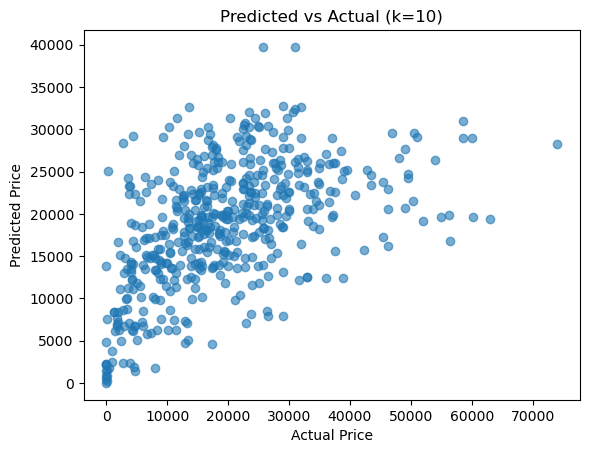

k = 25
MSE: 112574337.59190078
RMSE: 10610.105446785192



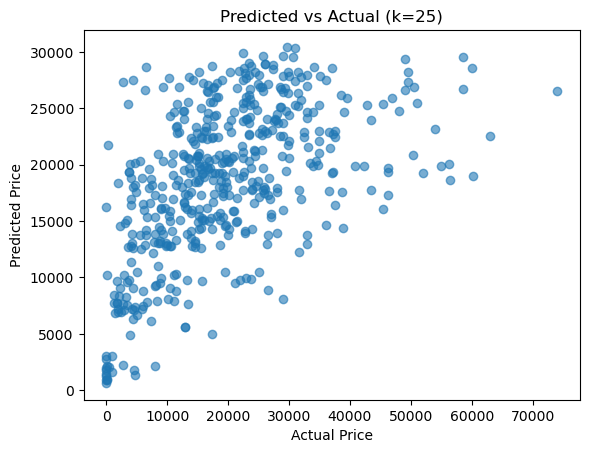

k = 50
MSE: 110202287.21426159
RMSE: 10497.727716713822



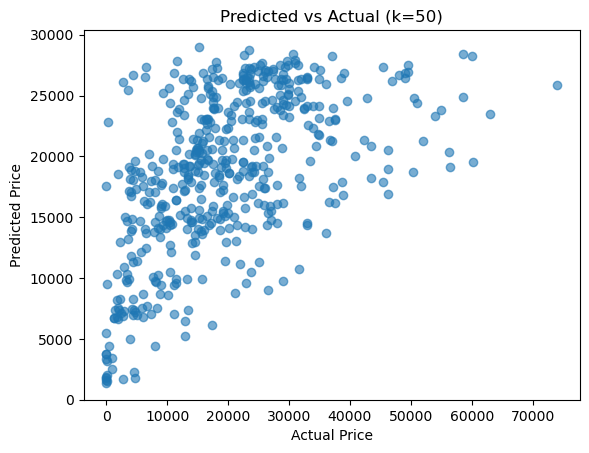

k = 100
MSE: 112265833.48910719
RMSE: 10595.557252410426



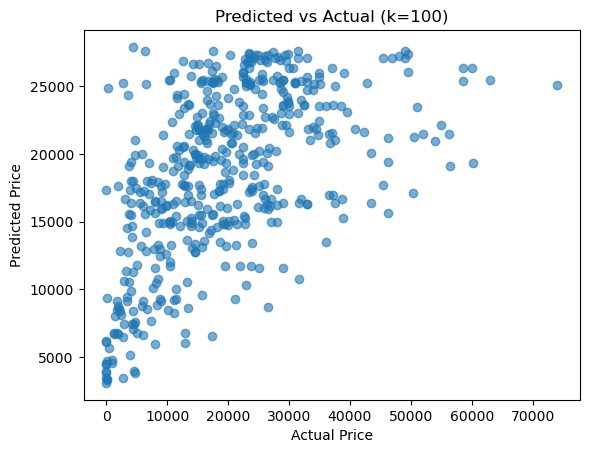

k = 300
MSE: 114500475.01771589
RMSE: 10700.489475613529



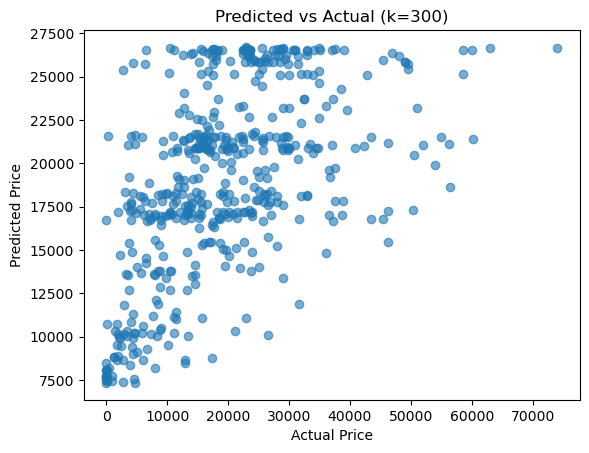

Optimal k: 50
Lowest MSE: 110202287.21426159
Lowest RMSE: 10497.727716713822


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
df = pd.read_csv("./data/USA_cars_datasets.csv")
df = df[['price','year','mileage']]
print("Dimensions:", df.shape)
print(df.head())
print("Missing values:\n", df.isna().sum())
df = df.dropna()
X = df[['year','mileage']]
y = df['price']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
diff_k = [3, 10, 25, 50, 100, 300]
mse_results = {}
for k in diff_k:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[k] = mse
    print(f"k = {k}")
    print("MSE:", mse)
    print("RMSE:", np.sqrt(mse))
    print()
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Predicted vs Actual (k={k})")
    plt.show()
best_k = min(mse_results, key=mse_results.get)
print("Optimal k:", best_k)
print("Lowest MSE:", mse_results[best_k])
print("Lowest RMSE:", np.sqrt(mse_results[best_k]))

The lowest MSE occurs when k is 50 since it produces the lowest MSE and RMSE. When k is smaller, the model closely follows individual training observations. The plot has a lot of dispersion meaning its overfitting. When k goes up, preductions are smoother and less scattered. Then at k=50, theres a good balance between between any sort of bias and variance. Now when k becomes very large such as 100 or 300, the predictions begin to cluster around the average price and is underfitting. 

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

Best k: 50 Best SSE: 321164.8816


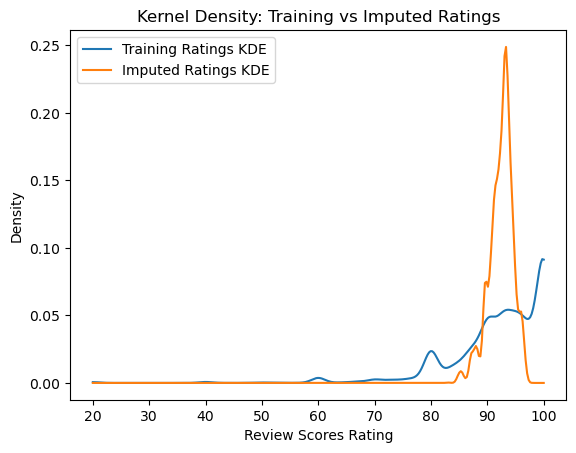

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import gaussian_kde
df = pd.read_csv("./data/airbnb_hw.csv")
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]
for col in ["Review Scores Rating", "Price", "Beds"]:
    df[col] = (df[col].astype(str)
                     .str.replace(",", "", regex=False)
                     .str.replace("$", "", regex=False)
                     .str.strip())
    df[col] = pd.to_numeric(df[col], errors="coerce")
missing_df = df[df["Review Scores Rating"].isna()].dropna(subset=["Price", "Beds"]).copy()
complete_df = df.dropna(axis=0, how="any").copy()
X = complete_df[["Price", "Beds"]]
y = complete_df["Review Scores Rating"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
diff_k = range(1, 51)
sse_results = {}
for k in diff_k:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sse_results[k] = np.sum((y_test.values - y_pred) ** 2)
best_k = min(sse_results, key=sse_results.get)
print("Best k:", best_k, "Best SSE:", sse_results[best_k])
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_scaled, y)
X_missing_scaled = scaler.transform(missing_df[["Price", "Beds"]])
missing_preds = final_model.predict(X_missing_scaled)
train_vals = y.values
pred_vals = missing_preds
kde_train = gaussian_kde(train_vals)
kde_pred = gaussian_kde(pred_vals)
diff_x = np.linspace(min(train_vals.min(), pred_vals.min()),max(train_vals.max(), pred_vals.max()), 300)
plt.figure()
plt.plot(diff_x, kde_train(diff_x), label="Training Ratings KDE")
plt.plot(diff_x, kde_pred(diff_x), label="Imputed Ratings KDE")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Kernel Density: Training vs Imputed Ratings")
plt.legend()
plt.show()

For choosing k, the value that minimized SSE was selected after fitting the model, predicted ratings on test, and computed the SSE. The imputed ratings do not look identical to the training ratings. They show a wider distribution, while the imputed ratings are more concentrated around 90-95.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
mnist = fetch_openml('mnist_784', version=1, as_frame=False)# had issues with keras
X = mnist.data.astype(np.float32)         
y = mnist.target.astype(int)              
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)
diff_k = [1, 3, 5, 7, 9]
best_k, best_acc = None, -1
for k in diff_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"k={k}, Accuracy={acc}")
    if acc > best_acc:
        best_acc = acc
        best_k = k
print("\nBest k:", best_k)
print("Best Accuracy:", best_acc)
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)
cm = confusion_matrix(y_test, final_preds)
print("\nConfusion Matrix:\n", cm)

X_train: (60000, 784) X_test: (10000, 784)
y_train: (60000,) y_test: (10000,)
k=1, Accuracy=0.9727
k=3, Accuracy=0.9735
k=5, Accuracy=0.9717
k=7, Accuracy=0.9702
k=9, Accuracy=0.9672

Best k: 3
Best Accuracy: 0.9735

Confusion Matrix:
 [[ 982    1    1    0    0    0    1    0    0    1]
 [   0 1121    0    2    1    0    0    1    0    0]
 [   6    6  967    3    2    0    1   14    0    0]
 [   2    2    4  991    0    9    1    5    3    3]
 [   0    5    1    0  940    0    3    2    0   24]
 [   4    0    1    7    2  874    9    1    1    3]
 [   4    3    0    0    2    4  969    0    0    0]
 [   1    9    2    0    3    0    0 1017    0   10]
 [   5    8    0   14    4   16    3    3  915    7]
 [   1    5    1    7    9    3    0    8    1  959]]


The confusion matrix is very diagonal and classified correctly. Thus, kNN works well on MNIST. Most errors came from visually similar digits such as 4 and 9. That was something i noticed where in general that digits with similar shapes tend to be mistaken for each other. 

For represting a color photo. A color photo is made of pixels. Each having three numbers: red. green, and blue each from 0 to 255. So a color image can be stored as a big table like height x width x 3. To turn it into tabular data, we can flatten the pixel numbers into one long row then one row would be one image and each pixel RGB value would be a feature column.